# Project Business Statistics: E-news Express

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading the Data into a DataFrame

In [ ]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# Check the first five rows of the dataset.
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Check the last five rows of the dataset.
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Check the shape of the dataset - rows by columns.
df.shape

(100, 6)

In [ ]:
# Get the statistical summary.
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


In [ ]:
# Check for missing values.
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# Check for duplicates.
duplicate_rows = df[df.duplicated()]

if duplicate_rows.empty:
    print("No duplicates found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicates found.


### Univariate Analysis

In [ ]:
# Calculate frequency distribution for categorical variables
categorical_columns = ['group', 'converted', 'language_preferred']
for column in categorical_columns:
    freq_dist = df[column].value_counts()
    print(freq_dist)

control      50
treatment    50
Name: group, dtype: int64
yes    54
no     46
Name: converted, dtype: int64
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64


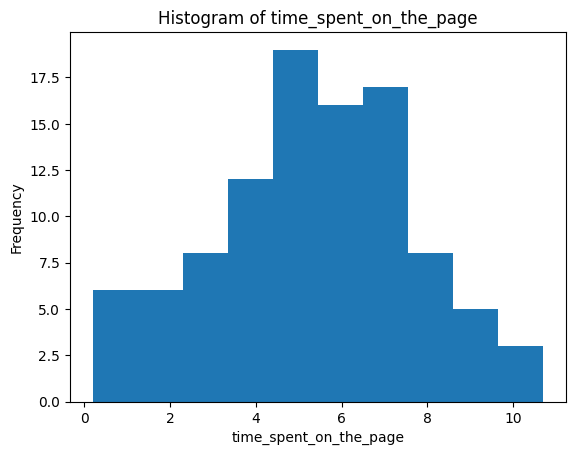

In [ ]:
# Plot histograms for numerical variables.
numerical_columns = ['time_spent_on_the_page']
for column in numerical_columns:
    plt.hist(df[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


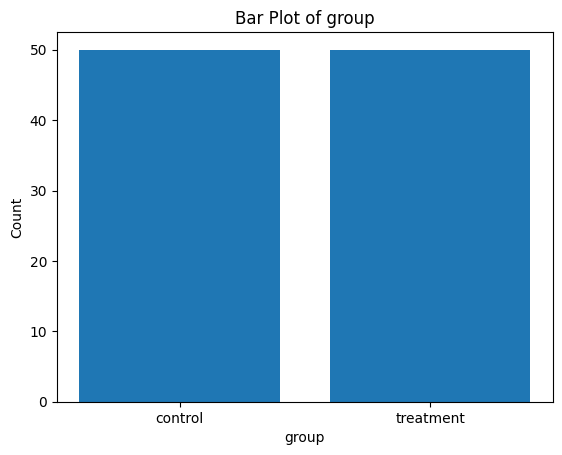

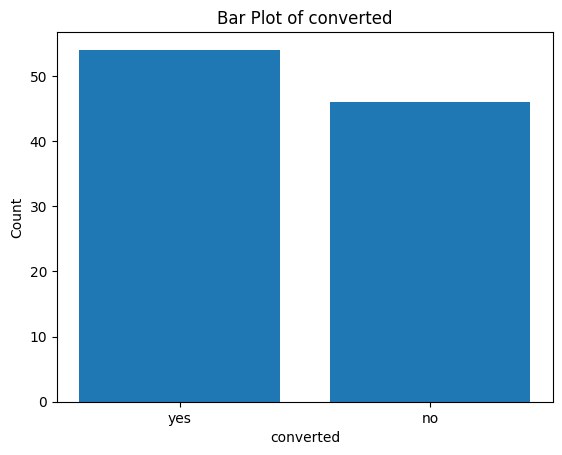

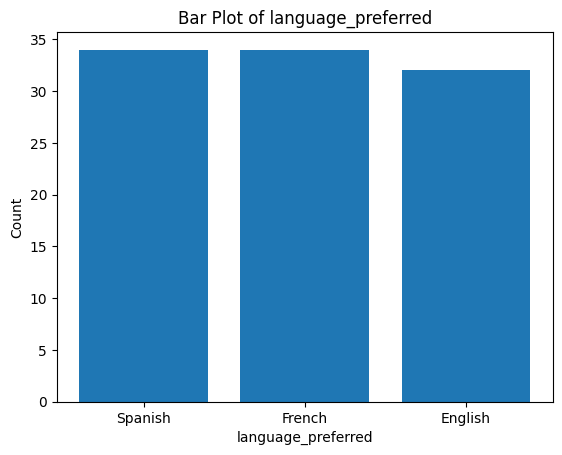

In [ ]:
# Plot bar plots for categorical variables
for column in categorical_columns:
    plt.bar(df[column].value_counts().index, df[column].value_counts())
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar Plot of {column}')
    plt.show()

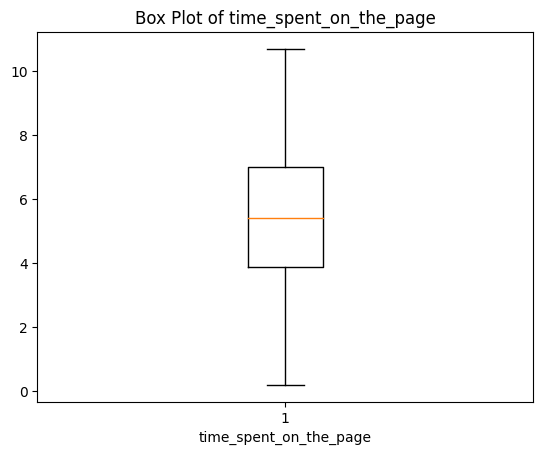

In [ ]:
# Plot box plots for numerical variables
for column in numerical_columns:
    plt.boxplot(df[column])
    plt.xlabel(column)
    plt.title(f'Box Plot of {column}')
    plt.show()

### Bivariate Analysis

#### Landing page vs Time spent on the page

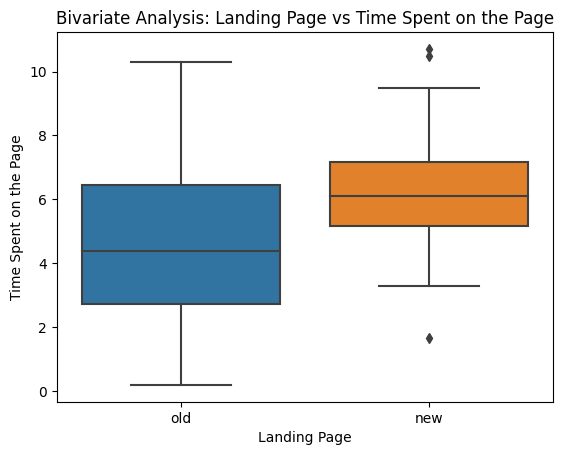

In [ ]:
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.title('Bivariate Analysis: Landing Page vs Time Spent on the Page')
plt.show()

In [ ]:
landing_pages = df['landing_page'].unique()
for landing_page in landing_pages:
    subset = df[df['landing_page'] == landing_page]
    avg_time_spent = subset['time_spent_on_the_page'].mean()
    median_time_spent = subset['time_spent_on_the_page'].median()
    print(f"Landing Page: {landing_page}")
    print(f"Average Time Spent: {avg_time_spent:.2f}")
    print(f"Median Time Spent: {median_time_spent:.2f}")
    print()

Landing Page: old
Average Time Spent: 4.53
Median Time Spent: 4.38

Landing Page: new
Average Time Spent: 6.22
Median Time Spent: 6.11



#### Conversion status vs Time spent on the page

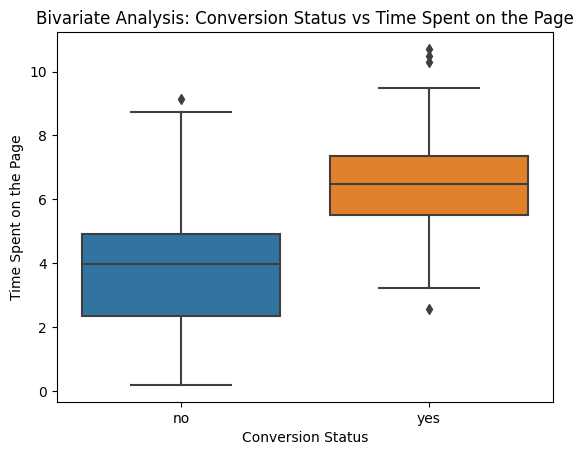

In [ ]:
sns.boxplot(x='converted', y='time_spent_on_the_page', data=df)
plt.xlabel('Conversion Status')
plt.ylabel('Time Spent on the Page')
plt.title('Bivariate Analysis: Conversion Status vs Time Spent on the Page')
plt.show()

In [ ]:
conversion_status = df['converted'].unique()
for status in conversion_status:
    subset = df[df['converted'] == status]
    avg_time_spent = subset['time_spent_on_the_page'].mean()
    median_time_spent = subset['time_spent_on_the_page'].median()
    print(f"Conversion Status: {status}")
    print(f"Average Time Spent: {avg_time_spent:.2f}")
    print(f"Median Time Spent: {median_time_spent:.2f}")
    print()

Conversion Status: no
Average Time Spent: 3.92
Median Time Spent: 3.98

Conversion Status: yes
Average Time Spent: 6.62
Median Time Spent: 6.49



#### Language preferred vs Time spent on the page

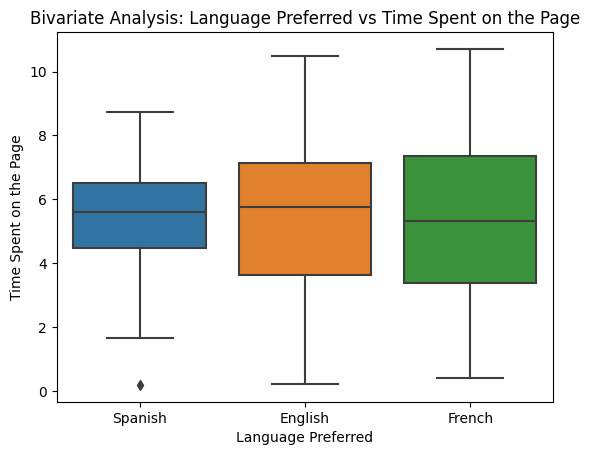

In [ ]:
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df)
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the Page')
plt.title('Bivariate Analysis: Language Preferred vs Time Spent on the Page')
plt.show()


In [ ]:
language_preferences = df['language_preferred'].unique()
for preference in language_preferences:
    subset = df[df['language_preferred'] == preference]
    avg_time_spent = subset['time_spent_on_the_page'].mean()
    median_time_spent = subset['time_spent_on_the_page'].median()
    print(f"Language Preferred: {preference}")
    print(f"Average Time Spent: {avg_time_spent:.2f}")
    print(f"Median Time Spent: {median_time_spent:.2f}")
    print()


Language Preferred: Spanish
Average Time Spent: 5.33
Median Time Spent: 5.61

Language Preferred: English
Average Time Spent: 5.56
Median Time Spent: 5.76

Language Preferred: French
Average Time Spent: 5.25
Median Time Spent: 5.31



## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

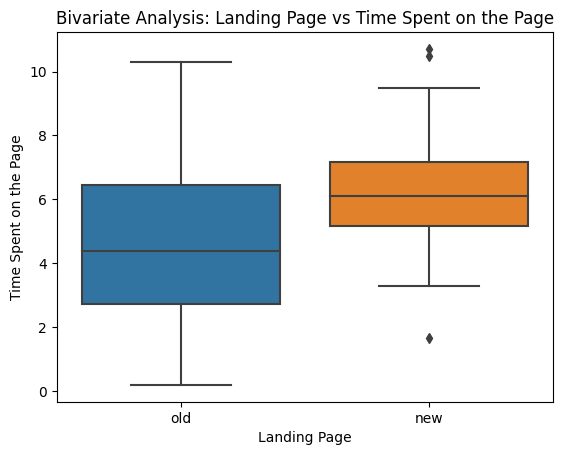

In [ ]:
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df)
plt.xlabel('Landing Page')
plt.ylabel('Time Spent on the Page')
plt.title('Bivariate Analysis: Landing Page vs Time Spent on the Page')
plt.show()

### Step 1: Define the null and alternate hypotheses

- H0: μ_new <= μ_existing
- H1: μ_new > μ_existing

### Step 2: Select Appropriate test

For a one-tailed test concerning two population means from two independent populations, where the population standard deviations are unknown, the appropriate test is the independent samples t-test.

### Step 3: Decide the significance level

α=0.05


### Step 4: Collect and prepare data

In [ ]:
# create subsetted data frame for new landing page users
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# create subsetted data frame for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [ ]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


In [ ]:
from scipy.stats import levene

# Perform Levene's test for equal variances
statistic, p_value = levene(time_spent_new, time_spent_old)

# Set the significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value > alpha:
    print("The population standard deviations can be assumed to be equal.")
else:
    print("The population standard deviations are not assumed to be equal.")


The population standard deviations are not assumed to be equal.


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# Perform independent samples t-test
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var=False, alternative='greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

- Statistical Significance: The obtained p-value is less than the significance level of 0.05, indicating that the observed difference in the average time spent on the new and existing landing pages is statistically significant. This means that the likelihood of observing such a significant difference by chance, under the assumption of the null hypothesis, is very low.

- Time Spent on the New Landing Page: The data suggests that users spend more time on the new landing page compared to the existing landing page. The alternative hypothesis, which states that the average time spent on the new landing page is greater than the average time spent on the existing landing page, is supported by the statistical evidence.

- Practical Significance: While the statistical analysis indicates a significant difference, it is also important to consider the practical significance or the magnitude of the difference. The obtained results do not provide specific information about the actual difference in time spent between the two landing pages. Therefore, additional analysis or further investigations may be needed to understand the practical implications of this difference.

- Decision-Making: The findings of this analysis can inform decision-making related to landing page optimization. The evidence suggests that the new landing page may be more engaging or effective in capturing user attention, as it leads to a significantly higher average time spent. This information can be used to support decisions on design choices, user experience improvements, or further experimentation.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

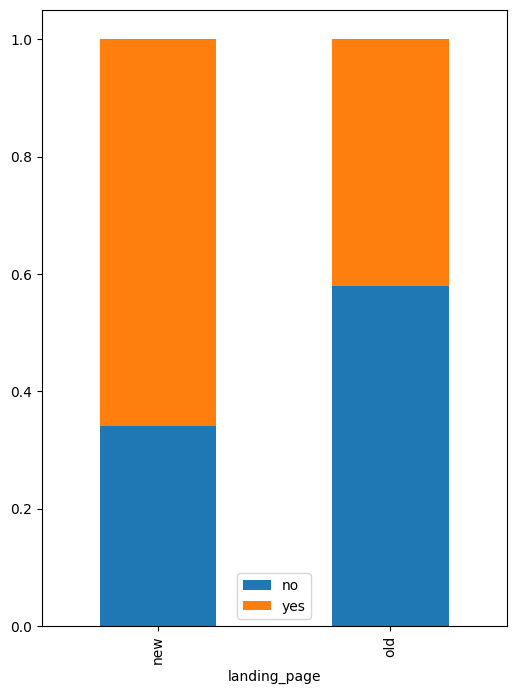

In [ ]:
# Compare the conversion rate for the new page and the conversion rate for the old page.
pd.crosstab(df['landing_page'], df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

- H0: p_new <= p_old
- H1: p_new > p_old

### Step 2: Select Appropriate test

For a one-tailed test concerning two population proportions from two independent populations, the appropriate test to use is the two-sample Z-test for proportions.

### Step 3: Decide the significance level

α=0.05

### Step 4: Collect and prepare data

In [ ]:
# Calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# Calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Perform the two-sample Z-test for proportions
test_stat, p_value = proportions_ztest([new_converted, old_converted], [n_treatment, n_control], alternative='larger')

print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

- Statistical Significance: The p-value is less than the significance level of 0.05, suggesting that there is strong evidence to reject the null hypothesis.

- Conversion Rate Difference: The results indicate that the conversion rate for the new landing page is statistically significantly greater than the conversion rate for the old landing page. This suggests that the new landing page design may be more effective in converting users compared to the old landing page.

- Practical Significance: While the statistical analysis indicates a significant difference in conversion rates, it's important to consider the practical significance or the magnitude of the difference. The obtained result does not provide specific information about the actual difference in conversion rates between the two landing pages. Additional analysis or further investigations may be necessary to understand the practical implications of this difference.

- Decision-Making: The findings from this analysis can inform decision-making related to landing page optimization. The evidence suggests that implementing the new landing page may lead to a higher conversion rate, which can positively impact business outcomes. However, it is important to consider other factors such as user experience, marketing strategies, and cost-effectiveness before making conclusive decisions.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

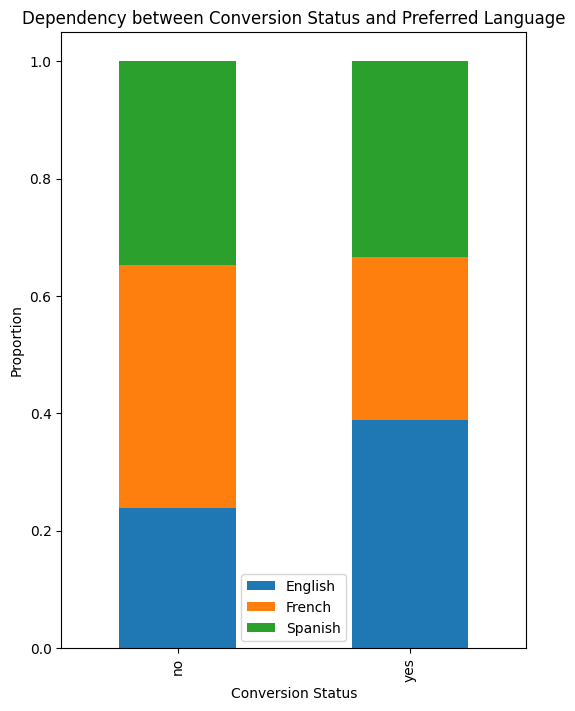

In [ ]:
# Create a cross-tabulation of conversion status and preferred language
conversion_language_crosstab = pd.crosstab(df['converted'], df['language_preferred'], normalize='index')

# Plot the stacked bar chart
conversion_language_crosstab.plot(kind='bar', figsize=(6, 8), stacked=True)
plt.xlabel('Conversion Status')
plt.ylabel('Proportion')
plt.title('Dependency between Conversion Status and Preferred Language')
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

- H0: The converted status and preferred language are independent.
- H1: The converted status and preferred language are dependent.

### Step 2: Select Appropriate test

The chi-square test of independence is used to assess whether there is a significant association or dependency between two categorical variables.

### Step 3: Decide the significance level

α=0.05

### Step 4: Collect and prepare data

In [ ]:
# Create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.21298887487543447


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- Statistical Significance: The p-value is greater than the chosen significance level of 0.05. This indicates that we do not have sufficient evidence to reject the null hypothesis.

- Independence: The p-value suggests that there is no significant association or dependency between the converted status and preferred language.

- Conclusion: Based on the results, we fail to reject the null hypothesis, which suggests that the converted status and preferred language are independent variables. This means that there is no significant evidence to suggest that the preferred language has an influence on the conversion status.

- Practical Implications: The lack of a significant association between the converted status and preferred language suggests that other factors may play a more significant role in determining the conversion status. It indicates that the preferred language alone may not be a strong predictor or influencer of the conversion outcome.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

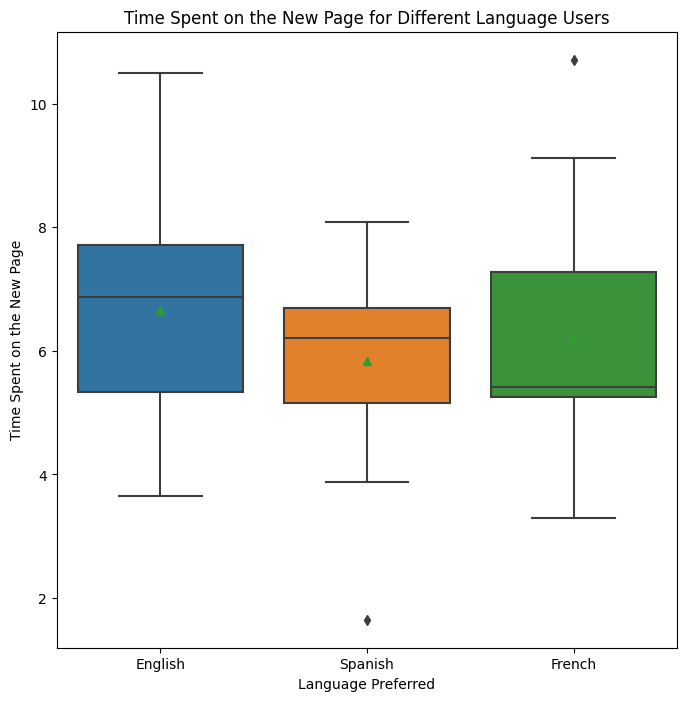

In [ ]:
# Plot the time spent on the new page for different language users.
df_new = df[df['landing_page'] == 'new']
plt.figure(figsize=(8, 8))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', showmeans=True, data=df_new)
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent on the New Page')
plt.title('Time Spent on the New Page for Different Language Users')
plt.show()


In [ ]:
# Calculate the mean time spent on the new page for different language users.
df_new.groupby('language_preferred')['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

- H0: μ1 = μ2 = μ3 = ... = μn
- H1: At least one pair of means is significantly different

where:

μ1, μ2, μ3, ..., μn represent the population means of time spent on the new page for different language users.

### Step 2: Select Appropriate test

The one-way ANOVA test is used to compare the means of three or more independent groups. It assesses whether there are any statistically significant differences among the means of the groups based on the variances and means of the samples.

### Step 3: Decide the significance level

α=0.05

### Step 4: Collect and prepare data

In [ ]:
# Create a subsetted data frame of the time spent on the new page by English language users
time_spent_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# Create subsetted data frames of the time spent on the new page by French and Spanish language users
time_spent_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_spent_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

- Statistical Significance: The p-value is greater than the chosen significance level (0.05). This suggests that there is no significant evidence to reject the null hypothesis.

- Equality of Means: The p-value indicates that there is no significant difference in the mean time spent on the new page among the different language user groups.

- Conclusion: Based on the results, we fail to reject the null hypothesis, which suggests that the mean time spent on the new page is likely similar across English, French, and Spanish language users.

- Practical Implications: The lack of a significant difference in mean time spent on the new page among language user groups suggests that the language preference may not significantly impact the time spent on the new page. Other factors or variables might have a more substantial influence on the time spent.

## Conclusion and Business Recommendations

Conclusions:

- Conversion Rate: The analysis comparing the conversion rates for the new and old landing pages indicated a statistically significant difference. The new landing page showed a higher conversion rate compared to the old landing page. This suggests that implementing the new landing page could potentially lead to increased conversions.

- Time Spent on the New Page: The analysis of the time spent on the new page for different language users did not reveal a significant difference. The preferred language did not appear to have a substantial impact on the time users spent on the new page. Therefore, language preference may not be a key factor influencing engagement with the page.

- Conversion Status and Preferred Language: The analysis of the contingency table did not provide significant evidence of an association between the conversion status and preferred language. The preferred language of the users did not appear to be strongly related to their conversion status. Other factors may have a more significant influence on the conversion outcome.

Business Recommendations:

- Implement the New Landing Page: Based on the significantly higher conversion rate observed for the new landing page, it is recommended to implement and promote the new landing page to attract more conversions. Monitor and track the performance of the new page to assess its long-term impact on conversions.

- Focus on User Experience: While language preference did not significantly affect the time spent on the new page or the conversion status, it is still essential to prioritize a positive user experience. Ensure that the page content and design are user-friendly, accessible, and cater to a diverse audience.

- Consider Additional Factors: While language preference did not show a strong association with the conversion status, it is crucial to consider other factors that may impact conversions. Analyze other variables such as demographics, source of traffic, or user behavior to identify potential factors influencing conversion rates.

- Continuous Testing and Optimization: Conduct ongoing testing and optimization of landing pages to identify the most effective designs, content, and user experiences. A/B testing and user feedback can provide valuable insights for further optimization efforts.

___